In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer['data']
y = cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train,y_train

(array([[1.989e+01, 2.026e+01, 1.305e+02, ..., 1.613e-01, 2.549e-01,
         9.136e-02],
        [1.613e+01, 1.788e+01, 1.070e+02, ..., 1.864e-01, 4.270e-01,
         1.233e-01],
        [9.742e+00, 1.567e+01, 6.150e+01, ..., 5.159e-02, 2.841e-01,
         8.175e-02],
        ...,
        [1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
         6.825e-02],
        [9.000e+00, 1.440e+01, 5.636e+01, ..., 1.389e-02, 2.991e-01,
         7.804e-02],
        [1.283e+01, 1.573e+01, 8.289e+01, ..., 9.783e-02, 3.006e-01,
         7.802e-02]]),
 array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
 

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
np.mean(model.predict(x_test)==y_test)

np.float64(0.868421052631579)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)
np.mean(model.predict(x_test)==y_test)

np.float64(0.9473684210526315)

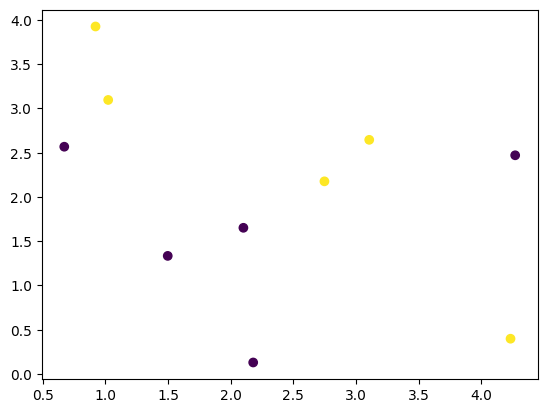

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(2)
x = np.random.uniform(0, 5, (10, 2))
y = np.array([-1, 1]*5)
plt.scatter(x[:, 0], x[:, 1], c=y)

In [ ]:
x1 = np.arange(0, 5, 0.05)
x2 = np.arange(0, 5, 0.05)
xx1, xx2 = np.meshgrid(x1, x2)
points = np.c_[xx1.flatten(), xx2.flatten()]

def visualize():
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].scatter(points[:,0], points[:,1], c=labels, alpha=0.05, cmap='gray')
    axs[0].scatter(x[:, 0], x[:, 1], c=y)
    for i, (x1, x2) in enumerate(x):
        axs[0].text(x1, x2, s=f'{weights[i]:.2f}')
    _ = plot_tree(model, filled = True, ax=axs[1])
    plt.show()

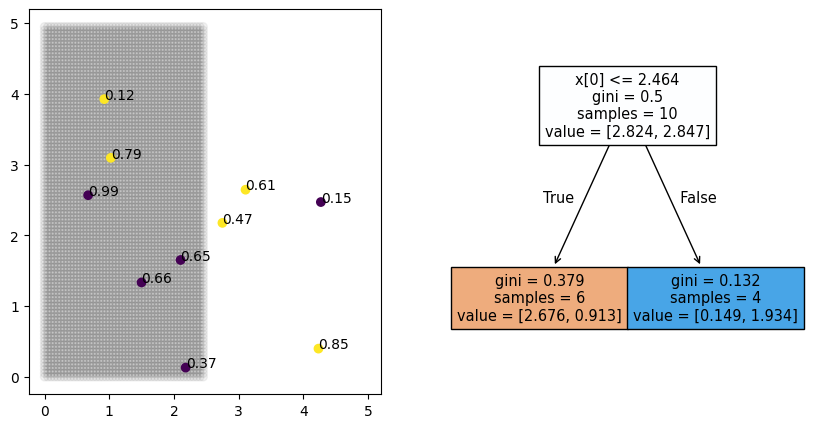

In [ ]:
weights=np.random.random(10)
model=DecisionTreeClassifier(max_depth=1)
model.fit(x,y,sample_weight=weights)
labels=model.predict(points)
visualize()

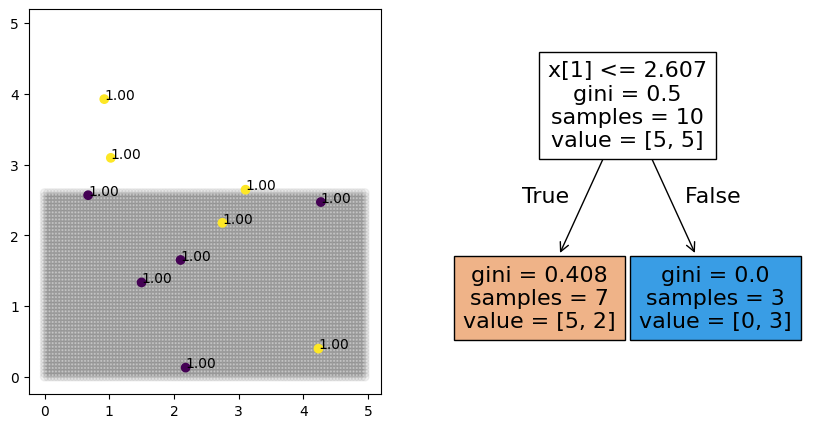

In [ ]:
def faultrate(y_test,y_pred,weights):
  return np.sum((y_test!=y_pred)*weights)/np.sum(weights)

weights=np.ones(10)
model=DecisionTreeClassifier(max_depth=1)
model.fit(x,y,sample_weight=weights)
labels=model.predict(points)
visualize()

y_pred=model.predict(x)
errorrate=faultrate(y,y_pred,weights)

d1=np.sqrt((1-errorrate)/errorrate)
weights[y_pred!=y]*=d1
weights[y_pred==y]/=d1

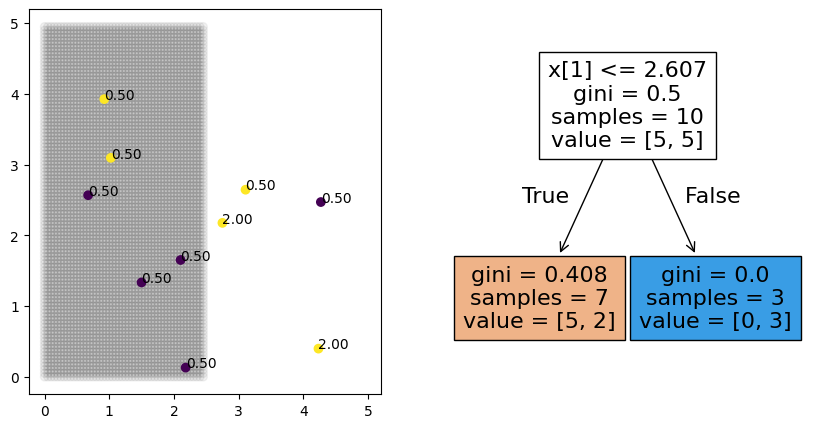

In [ ]:
model2=DecisionTreeClassifier(max_depth=1)
model2.fit(x,y,sample_weight=weights)
labels=model2.predict(points)
visualize()

y_pred=model2.predict(x)
errorrate=faultrate(y,y_pred,weights)
d2=np.sqrt((1-errorrate)/errorrate)
weights[y_pred!=y]*=d2
weights[y_pred==y]/=d2

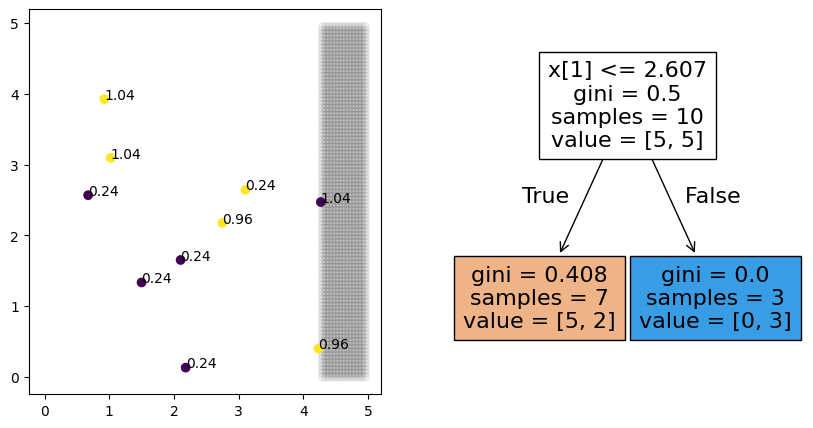

In [ ]:
model3=DecisionTreeClassifier(max_depth=1)
model3.fit(x,y,sample_weight=weights)
labels=model3.predict(points)
visualize()

y_pred=model3.predict(x)
errorrate=faultrate(y,y_pred,weights)
d3=np.sqrt((1-errorrate)/errorrate)
weights[y_pred!=y]*=d3
weights[y_pred==y]/=d3

In [ ]:
(model.predict(x)*d1+model2.predict(x)*d2+model3.predict(x)*d3)>0

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

In [ ]:
y>0

array([False,  True, False,  True, False,  True, False,  True, False,
        True])